In [32]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import csv
import os 
import pandas as pd
import librosa
import glob 
import matplotlib
import librosa.display
import numpy as np

In [36]:
speaker_dir = os.path.join('feature', speaker)
filenames = os.listdir(speaker_dir)
for filename in filenames:
    file_path = os.path.join(speaker_dir, filename)
    with open(file_path, 'r') as file:
        matrix = []
        for line in file:
            line = line.rstrip()
        entries = line.split(',')
        matrix.append(entries)
        mat = numpy.array(matrix)

In [37]:

#Read csv
train = pd.read_csv('./data/train/train.csv')


data_dir = './data/train/'
def parser(row):
   # function to load files and extract features
   file_name = os.path.join(os.path.abspath(data_dir), 'Train', str(row.ID) + '.wav')

   # handle exception to check if there isn't a file which is corrupted
   try:
      # here kaiser_fast is a technique used for faster extraction
      X, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
      print X, sample_rate

      # we extract mfcc feature from data
      mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 
   except Exception as e:
      print("Error encountered while parsing file: ", file)
      return None, None
 
   feature = mfccs
   label = row.Class
 
   return [feature, label]


SyntaxError: Missing parentheses in call to 'print'. Did you mean print(print X, sample_rate)? (<ipython-input-37-8fe771476fed>, line 15)

In [38]:
# Convert the data to pass it in our deep learning model

from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical
import tensorflow

temp = train.apply(parser, axis=1)
temp.columns = ['feature', 'label']

X = np.array(temp.feature.tolist())
y = np.array(temp.label.tolist())

lb = LabelEncoder()

y = to_categorical(lb.fit_transform(y))



NameError: name 'train' is not defined

In [ ]:
# Testing/Validation
# Creating validation dataset for our deep learning model
test = pd.read_csv('./data/test/test.csv')

data_dir = './data/test/'
def parser2(row):
    # function to load files and extract features
    file_name = os.path.join(os.path.abspath(data_dir), 'Test', str(row.ID) + '.wav')

    # handle exception to check if there isn't a file which is corrupted
    try:
        # here kaiser_fast is a technique used for faster extraction
        X, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
        print X, sample_rate
        
        # we extract mfcc feature from data
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
    except Exception as e:
        print("Error encountered while parsing file: ", file)
        return None, None
 
    feature = mfccs
    label = row.Class
    return [feature, label]



In [ ]:
# Convert the validation data to pass it in our deep learning model

test_temp = test.apply(parser2, axis=1)
test_temp.columns = ['feature', 'label']


val_X = np.array(test_temp.feature.tolist())
val_y = np.array(test_temp.label.tolist())


lb2 = LabelEncoder()

val_y = to_categorical(lb2.fit_transform(val_y))

In [ ]:
# Run a deep learning model and get results

import numpy as np
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import Adam
# from keras.utils import np_utils
from sklearn import metrics 


num_labels = y.shape[1]
filter_size = 2


In [ ]:
# build model
model = Sequential()

model.add(Dense(256, input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_labels))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')



In [ ]:

#Model training and saving the model file (architecture + weights + optimizer state)

model.fit(X, y, batch_size=32, nb_epoch=117, validation_data=(val_X, val_y))

model.save('audio_model.h5')  # creates a HDF5 file 'audio_model.h5'
print "Model file saved."

# evaluate loaded model on test data
loaded_model = load_model('audio_model.h5')

loaded_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print "Model loaded from disk"

score = loaded_model.evaluate(val_X, val_y, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))


# Inference part
preds = loaded_model.predict(val_X)
print "Predicted Classes : ", preds

df = pd.DataFrame(preds)
df.to_csv('predict_output.csv', index=False, encoding='utf-8')



In [31]:
# Generate mfccs from a time series

y, sr = librosa.load(librosa.util.example_audio_file(), offset=30, duration=5)
librosa.feature.mfcc(y=y, sr=sr)
# array([[ -5.229e+02,  -4.944e+02, ...,  -5.229e+02,  -5.229e+02],
# [  7.105e-15,   3.787e+01, ...,  -7.105e-15,  -7.105e-15],
# ...,
# [  1.066e-14,  -7.500e+00, ...,   1.421e-14,   1.421e-14],
# [  3.109e-14,  -5.058e+00, ...,   2.931e-14,   2.931e-14]])

# Use a pre-computed log-power Mel spectrogram

S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,
                                   fmax=8000)
librosa.feature.mfcc(S=librosa.power_to_db(S))
# array([[ -5.207e+02,  -4.898e+02, ...,  -5.207e+02,  -5.207e+02],
# [ -2.576e-14,   4.054e+01, ...,  -3.997e-14,  -3.997e-14],
# ...,
# [  7.105e-15,  -3.534e+00, ...,   0.000e+00,   0.000e+00],
# [  3.020e-14,  -2.613e+00, ...,   3.553e-14,   3.553e-14]])

# Get more components

mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)

NoBackendError: 

In [28]:
# Visualize the MFCC series

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()

NameError: name 'mfccs' is not defined

In [4]:
# Compare different DCT bases

m_slaney = librosa.feature.mfcc(y=y, sr=sr, dct_type=2)
m_htk = librosa.feature.mfcc(y=y, sr=sr, dct_type=3)
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
librosa.display.specshow(m_slaney, x_axis='time')
plt.title('RASTAMAT / Auditory toolbox (dct_type=2)')
plt.colorbar()
plt.subplot(2, 1, 2)
librosa.display.specshow(m_htk, x_axis='time')
plt.title('HTK-style (dct_type=3)')
plt.colorbar()
plt.tight_layout()

NameError: name 'librosa' is not defined

In [5]:
% pylab inline
import os
import pandas as pd
import librosa
import librosa.display
import glob 

plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, sr=sampling_rate)

Populating the interactive namespace from numpy and matplotlib


NameError: name 'data' is not defined

In [4]:
def train(data):
    i = random.choice(train.index)

    audio_name = train.ID[i]
    path = os.path.join(data_dir, 'Train', str(audio_name) + '.wav')

    print('Class: ', train.Class[i])
    x, sr = librosa.load('../data/Train/' + str(train.ID[i]) + '.wav')

    plt.figure(figsize=(12, 4))
    librosa.display.waveplot(x, sr=sr)

In [5]:
   train.Class.value_counts()


AttributeError: 'function' object has no attribute 'Class'

In [6]:
test = pd.read_csv('../data/test.csv')
test['Class'] = 'jackhammer'
test.to_csv(‘sub01.csv’, index=False)

SyntaxError: invalid character in identifier (<ipython-input-6-fc7f47d20aef>, line 3)

In [7]:
#step 2combined: Load audio files and extract features
def parser(row):
   # function to load files and extract features
   file_name = os.path.join(os.path.abspath(data_dir), 'Train', str(row.ID) + '.wav')

   # handle exception to check if there isn't a file which is corrupted
   try:
      # here kaiser_fast is a technique used for faster extraction
      X, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
      # we extract mfcc feature from data
      mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 
except Exception as e:
        print("Error encountered while parsing file: ", file)
        return None, None
    feature = mfccs
     label = row.Class
 
     return [feature, label]

temp = train.apply(parser, axis=1)
temp.columns = ['feature', 'label']

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 15)

In [30]:
#step3
from sklearn.preprocessing import LabelEncoder

X = np.array(temp.feature.tolist())
y = np.array(temp.label.tolist())

lb = LabelEncoder()

y = np_utils.to_categorical(lb.fit_transform(y))

NameError: name 'temp' is not defined

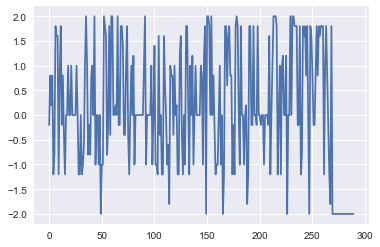

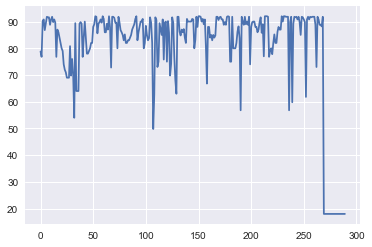

[78.8, 76.8, 90.2, 90.8, 86.8, 89.2, 91.8, 91.6, 91.6, 88.8, 90.8, 91.8, 89.8, 90.8, 89.6, 76.8, 87.0, 86.0, 84.0, 82.0, 80.0, 79.0, 74.0, 72.0, 71.0, 69.0, 69.0, 69.0, 80.8, 69.8, 76.0, 69.8, 54.0, 89.4, 64.0, 64.0, 64.0, 89.2, 89.8, 89.2, 76.8, 84.0, 90.0, 84.0, 78.0, 78.0, 79.0, 80.0, 82.0, 82.0, 88.0, 89.0, 92.0, 91.8, 85.6, 89.2, 89.8, 90.8, 89.6, 92.0, 91.0, 86.0, 86.0, 89.2, 87.0, 92.0, 87.8, 72.8, 91.8, 91.8, 91.4, 89.6, 89.6, 80.0, 91.8, 89.6, 86.8, 86.0, 85.0, 83.0, 85.2, 82.0, 82.0, 83.0, 83.0, 84.0, 85.0, 87.0, 88.0, 89.0, 91.0, 92.0, 83.0, 86.0, 88.0, 90.0, 90.0, 91.0, 80.0, 82.0, 88.4, 85.0, 83.0, 83.8, 91.6, 89.6, 82.0, 49.8, 62.8, 91.6, 90.6, 73.0, 75.0, 89.4, 87.2, 85.0, 90.8, 75.8, 89.6, 90.0, 75.0, 90.2, 85.8, 69.8, 74.2, 91.6, 89.6, 76.8, 68.0, 63.0, 91.8, 91.8, 86.2, 84.8, 87.0, 86.0, 87.2, 84.0, 82.0, 91.0, 90.0, 90.0, 90.0, 90.0, 91.0, 90.8, 80.0, 83.2, 91.8, 88.0, 92.0, 92.0, 91.8, 90.0, 91.0, 89.0, 90.8, 80.8, 66.8, 88.0, 88.0, 84.0, 85.0, 83.0, 85.0, 84.0, 84.

In [163]:
#Step 4: Run a deep learning model and get results

import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics 

num_labels = y.shape[1]
filter_size = 2

# build model
model = Sequential()

model.add(Dense(256, input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_labels))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [164]:
model.fit(X, y, batch_size=32, epochs=5, validation_data=(val_x, val_y))


(290, 80)


In [166]:
REDUCTION = 38000.0
scipy.io.wavfile.write("voiced_recon.wav", 8000, np.concatenate((recon.reshape(-1), np.zeros(n_samples_in_frame * 4))) / REDUCTION)


0.0
0.0


NameError: name 'voiced_unvoiced_decision_matrix' is not defined

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


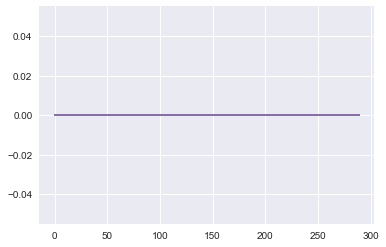

IndexError: list index out of range